# ORB

1. prétraitement des images 
2. Récupérer les descripteurs de chaque image
3. Clusteriser l'ensemble de tous les descripteurs
4. Associer les descripteurs de chaque image aux centres obtenus par clustering

## import modules

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import os
pd.options.mode.chained_assignment = None
#plot
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
#prepocessing
import cv2
from PIL import Image, ImageOps, ImageFilter
from IPython.display import display
from IPython.display import Image
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter
from PIL import Image as Image_PIL
#metrics
from sklearn import metrics
#clustering
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
#path = 'C:/Users/tropical noise/\Notebook/P6/Dataset+projet+prétraitement+textes+images/Flipkart/Images/'

In [3]:
#data = data.rename(columns={'image': 'image_id'})
#data['image_loc'] = [path + row for row in data['image_id']]

In [4]:
df = pd.read_csv('data/flipkart_com-ecommerce_sample_1050.csv')

In [5]:
def path(image):
    
    image = "Images/" + image
    
    return image 

In [6]:
#données images
df["image_manipulation"] = df["image"].copy()

#formatage image
# path des fichiers
df["image_manipulation"] = df["image_manipulation"].apply(path)

In [7]:
df_image = df[['image','image_manipulation', 'product_category_tree']]
df_image['cat_1']=df_image['product_category_tree'].apply(lambda x :x.split('>>')[0][2:len(x.split('>>')[0])-1])
del df_image['product_category_tree']

In [8]:
df_image.head()

image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                            image_manipulation            cat_1  
0  Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing  
1  Images/7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care  
2  Images/64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care  
3  Images/d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing  
4  Images/6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing

In [9]:
df_image["cat_1"].reset_index().groupby("cat_1").count().sort_values(by= "index")

index
cat_1                            
Baby Care                     150
Beauty and Personal Care      150
Computers                     150
Home Decor & Festive Needs    150
Home Furnishing               150
Kitchen & Dining              150
Watches                       150

In [10]:
df_image['Format_img'] = [Image_PIL.open(row).mode for row in df_image['image_manipulation']]

C:\Users\tropical noise\anaconda3\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [11]:
df_image.groupby('Format_img').count()

image  image_manipulation  cat_1
Format_img                                  
RGB          1050                1050   1050

In [12]:
df_image['Format_img']

0       RGB
1       RGB
2       RGB
3       RGB
4       RGB
       ... 
1045    RGB
1046    RGB
1047    RGB
1048    RGB
1049    RGB
Name: Format_img, Length: 1050, dtype: object

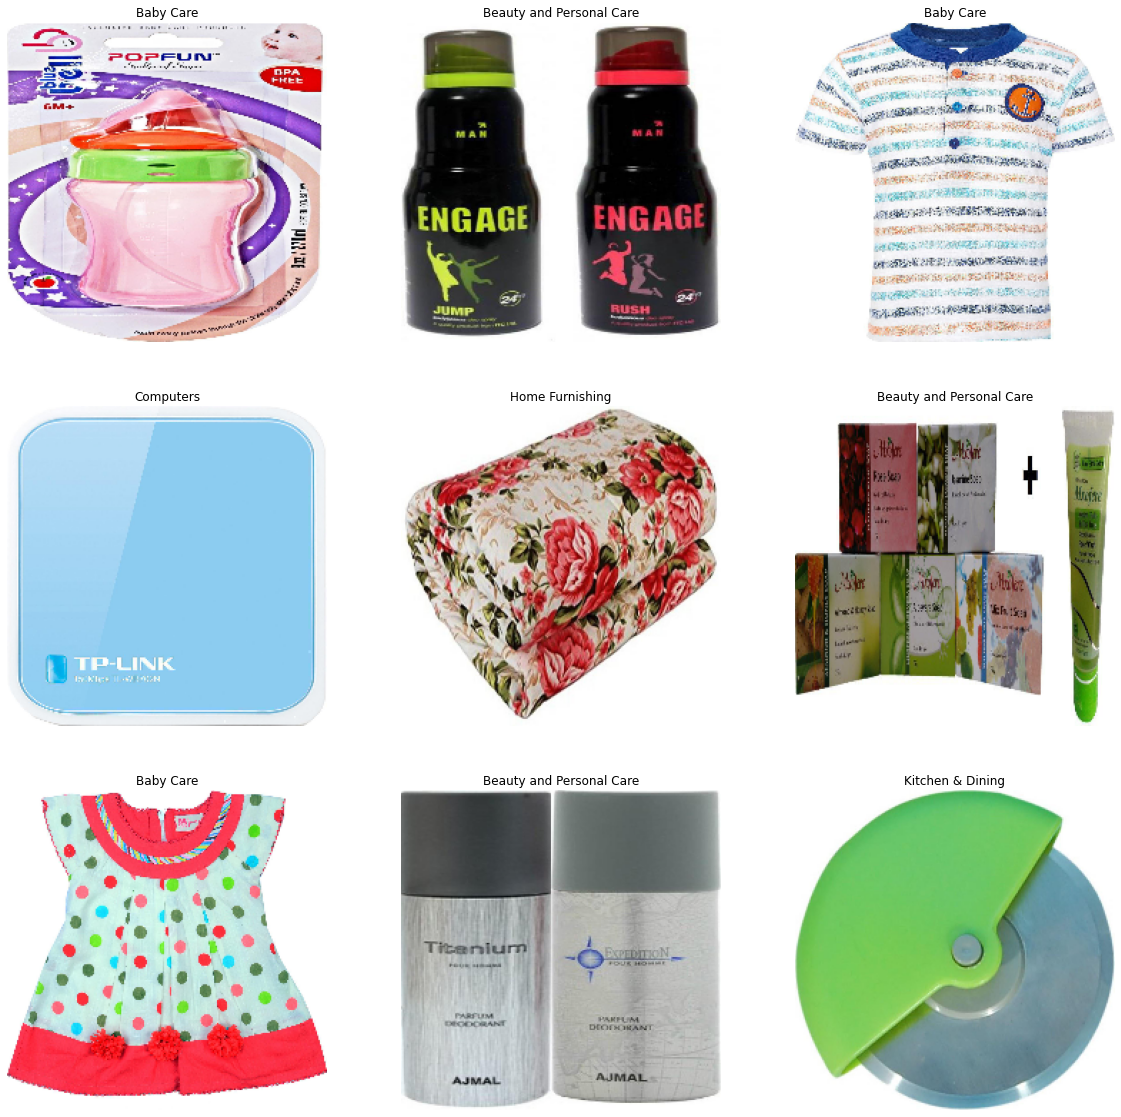

In [13]:
plt.figure(figsize=(20, 20))
df_visualisation = df_image.sample(9).reset_index(drop = True)

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = mpimg.imread(df_visualisation["image_manipulation"][i])
    img = cv2.resize(img, (224, 224))
    plt.imshow(img)
    plt.title(df_visualisation["cat_1"][i])
    plt.axis("off")

In [14]:
def redimension(img): 
 
    width = 224
    height = 224
    dim = (width, height)
 
    #resize d'image
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    return img

In [15]:
def process_image(image):
    
    file_dir=os.path.split(image)
    img = np.array(Image_PIL.open(image))
    
    #conversion niveau de gris de l'image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #suppression du bruit
    img = cv2.GaussianBlur(img, (5, 5), cv2.BORDER_DEFAULT)
    
    #egalisation de l'histogramme
    img = cv2.equalizeHist(img)
    
    #redimension
    img = redimension(img)
    
    #sauvegarde image
    cv2.imwrite("Images_OCV/"+file_dir[1], img)
    
    return "Images_OCV/"+file_dir[1]

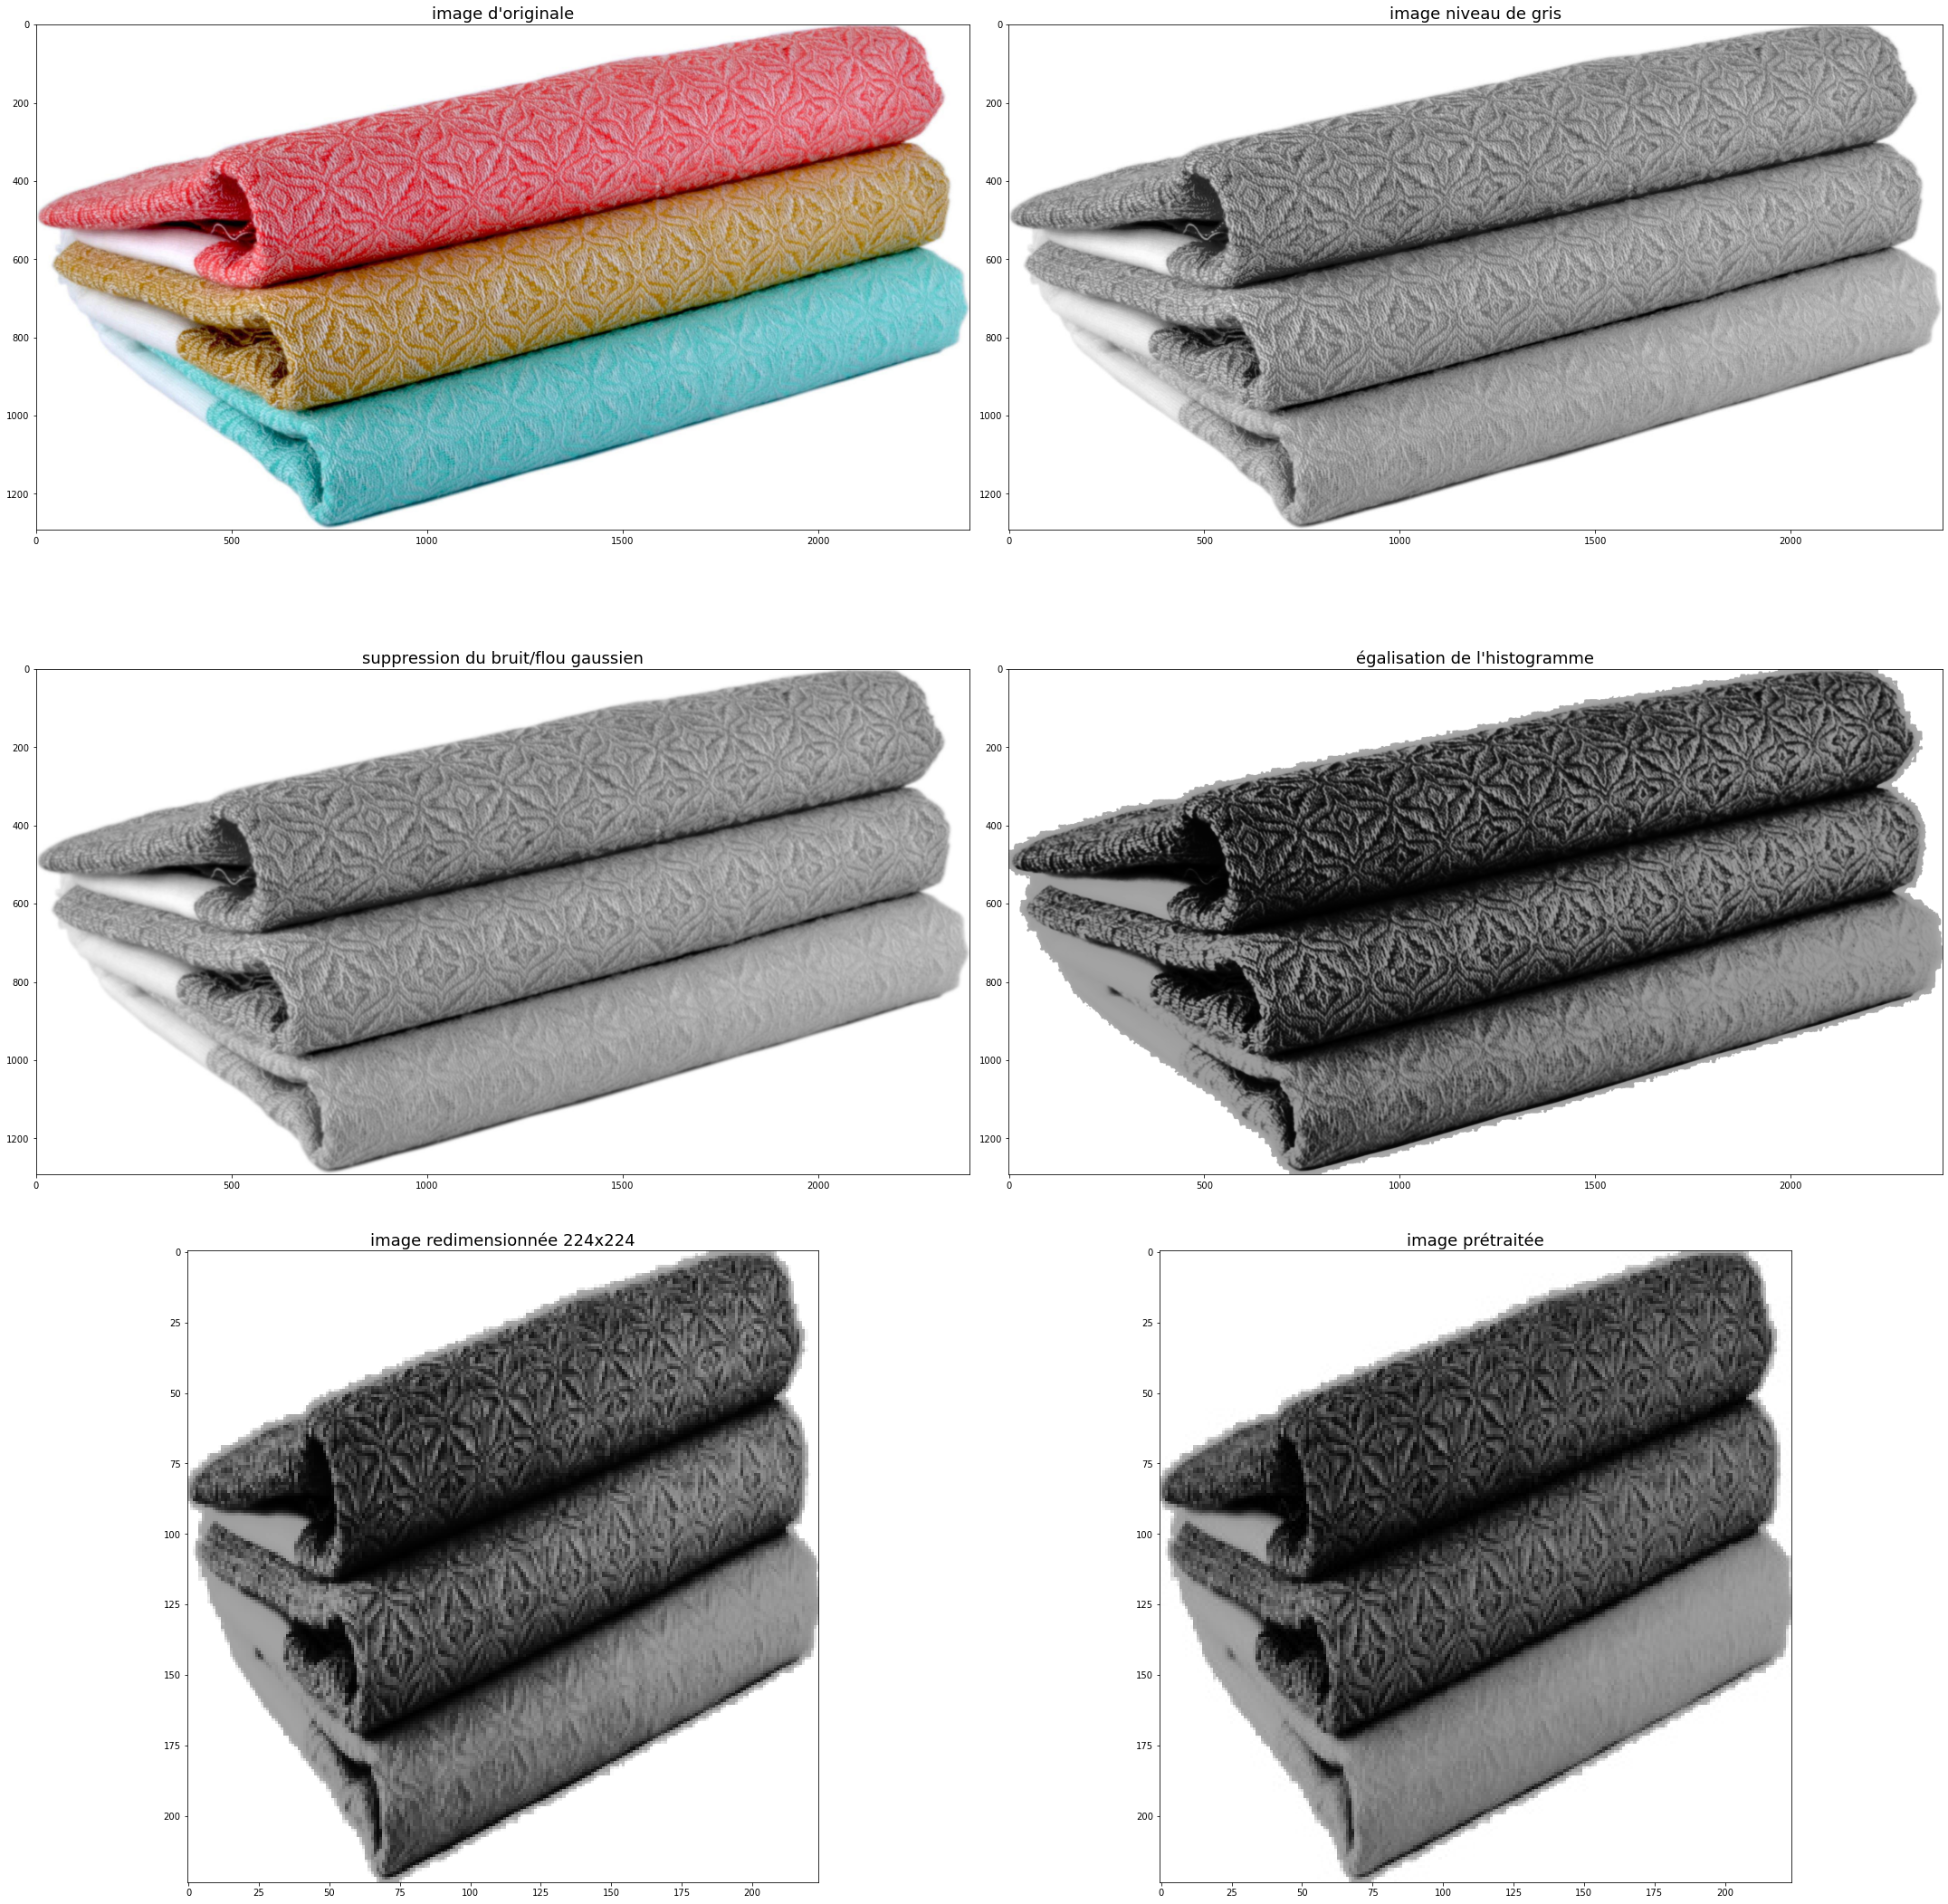

In [16]:
#image originale
im = cv2.imread(df_image.image_manipulation[1])
im = im[:,:,::-1]

#image convertie en niveau de gris
image = cv2.imread('Images/7b72c92c2f6c40268628ec5f14c6d590.jpg')
#image convertie en RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image convertie en niveau de gris
im_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#suppression du bruit (flou gaussien)
im_gaussblur =cv2.GaussianBlur(im_gray,(5,5),cv2.BORDER_DEFAULT)

#image avec égalisation de l'histogramme
im_equalize = cv2.equalizeHist(im_gaussblur)

#image redimensionnée en 224x224
im1 = redimension(im_equalize)

#image finale, redimensionnée et prétraitée
process_image(df_image.image_manipulation[950])
im2 = cv2.imread('Images_OCV/7b72c92c2f6c40268628ec5f14c6d590.jpg')

plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.imshow(im, cmap="gray")
plt.title("image d'originale", fontsize=18, ha='center' )

plt.subplot(3, 2, 2)
plt.imshow(im_gray, cmap="gray")
plt.title("image niveau de gris", fontsize=18, ha='center' )

plt.subplot(3, 2, 3)
plt.imshow(im_gaussblur, cmap="gray")
plt.title("suppression du bruit/flou gaussien", fontsize=18, ha='center' )

plt.subplot(3, 2, 4)
plt.imshow(im_equalize, cmap="gray")
plt.title("égalisation de l'histogramme", fontsize=18, ha='center' )

plt.subplot(3, 2, 5)
plt.imshow(im1, cmap="gray")
plt.title("image redimensionnée 224x224", fontsize=18, ha='center' )

plt.subplot(3, 2, 6)
plt.imshow(im2, cmap="gray")
plt.title("image prétraitée", fontsize=18, ha='center' )
plt.tight_layout()

plt.show()

In [17]:
#redimension en conservant les proportions d'origine
df_image["image_OCV"] = df_image["image_manipulation"].apply(process_image)

C:\Users\tropical noise\anaconda3\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


## Pré traitement avec OPENCV (Open Compute Vision)
1. retirer background, redimensionnement en 224 * 224
2. conversion de RGB en niveaux de gris
3. suppression du bruit, uniformiser
4. égalisation de l'histogramme

#### Descripteurs sur une image du jeu de données

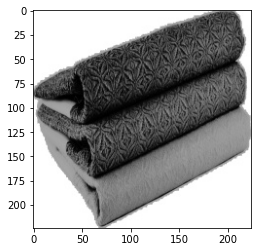

In [18]:
#chargement d'image
im = cv2.imread(df_image["image_OCV"][1])
plt.imshow(im)

In [19]:
df_image.head()

image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                            image_manipulation            cat_1 Format_img  \
0  Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing        RGB   
1  Images/7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care        RGB   
2  Images/64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care        RGB   
3  Images/d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing        RGB   
4  Images/6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing        RGB   

                                         image_OCV  
0  Images_OCV/55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1  Images_OCV/7b72c92c2f6c40268628ec5f14c6d590.jpg  
2  Images_OCV/64d5d4a258243731dc7bbb1eef49ad74.jpg  
3  Images_OCV/d4684dcdc759dd9cdf41504698d737d8.jpg  
4  Images_OCV/6325b6870c54cd47be6ebfbffa620ec7.jpg

# Algorithmes ORB

### Détection

In [20]:
im = np.array(im)
#récuperer descripteurs et points clés
orb = cv2.ORB_create()
keypoints_orb, desc_orb = orb.detectAndCompute(im, None)

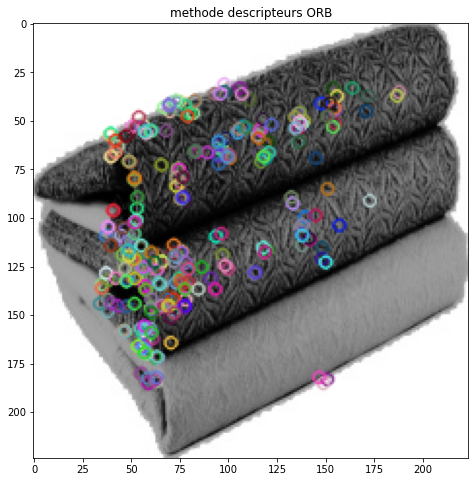

In [21]:
#afficher les images
im_orb = cv2.drawKeypoints(im, keypoints_orb, None) 
plt.figure(figsize=(15, 8))
plt.subplot(1, 1, 1)
plt.imshow(im_orb, cmap="gray")
plt.title("methode descripteurs ORB")
plt.show()

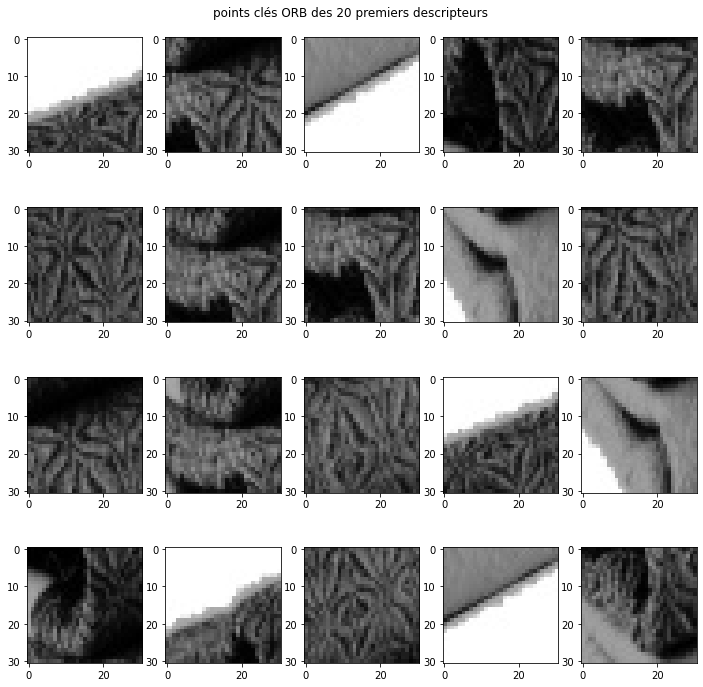

In [22]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('points clés ORB des 20 premiers descripteurs', y=0.90)

for i, kp in enumerate(keypoints_orb[0:20]):
    #recuperer les coordonées du centre et de taille
    plt.subplot(4, 5, i + 1)
    x_center = kp.pt[0]
    y_center = kp.pt[1]
    size = kp.size

    #limite de bordure 
    left = np.ceil(x_center - size / 2)
    upper = np.ceil(y_center + size / 2)
    right = np.ceil(x_center + size / 2)
    lower = np.ceil(y_center - size / 2)

    #couper et montrer les images
    cropped_np = np.array(im)[int(lower):int(upper), int(left):int(right)]
    plt.imshow(cropped_np, cmap="gray")
plt.show()

In [23]:
print("{} descripteurs sur {} features".format(desc_orb.shape[0],desc_orb.shape[1]))

319 descripteurs sur 32 features


In [24]:
def getDescriptors(detector, image):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    kp, des = detector.detectAndCompute(img, None)
    return des

def vstackDescriptors(descriptor_list):
    descriptors = np.array(descriptor_list[0])
    for descriptor in descriptor_list[1:]:
        descriptors = np.vstack((descriptors, descriptor)) 

    return descriptors

In [25]:
#descriptor list
descriptor_list = []

images = df_image["image_OCV"]
lien_im_des = []

for i in range(len(images)) :
    im = images[i]
    des = getDescriptors(orb, im)
    descriptor_list.append(des)
    
    
    for j in range(len(des)):
        lien_im_des.append(i)
    
descriptors = vstackDescriptors(descriptor_list)
descriptors = np.float32(descriptors)

In [26]:
#definir critère = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
#mettre des flags
flags = cv2.KMEANS_PP_CENTERS #kmeans
compactness,labels,centers = cv2.kmeans(descriptors,1000,None,criteria,1,flags)

In [27]:
data_images = []
for i in range(len(images)):
    #création numpy d'histograme pour chaque image
    data_images.insert(i, np.zeros((1000, 1)))

In [28]:
size = labels.shape[0] * labels.shape[1]
data_images = []
for i in range(len(images)):
    #création numpy d'histograme pour chaque image
    data_images.insert(i, np.zeros((1000, 1)))
    
#BOVW
df_image["BOVW_ORB"] = ""
for i in range(size):
    label = labels[i]
    #prendre les descripteurs image et id 
    image_id = lien_im_des[i]
    images_data = data_images[image_id]
    #(dictionary_size, 1) remplis de 0
    images_data[label] += 1
    df_image["BOVW_ORB"][image_id] = images_data.flatten()

## Reduction de dimension, clustering et ARI

In [29]:
def extract_data(col):
    v = np.column_stack(df_image[col].values.tolist())
    df = pd.DataFrame(v).T
    
    return df

In [30]:
df_BOVW_ORB = extract_data("BOVW_ORB")
print("Taille vecteurs bovw ORB :", df_BOVW_ORB.shape[1])

Taille vecteurs bovw ORB : 1000


In [31]:
#reduction PCA 80% variance expliquée 
#from sklearn.decomposition import PCA
#pca = PCA(n_components=0.8, random_state=42)
#pca.fit(df_BOVW_ORB)
#x = pca.transform(df_BOVW_ORB)



#reduction TSNE
tsne = TSNE(n_components=2, verbose=0, perplexity=80, n_iter=5000, learning_rate=200)
tsne = tsne.fit_transform(df_BOVW_ORB)
tsne_df = pd.DataFrame(tsne, columns=['tsne1', 'tsne2'])

In [32]:
#Partitionnemen,t
kmeans = KMeans(n_clusters=7, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df)
labels = kmeans.labels_
clusters = pd.concat([tsne_df, pd.DataFrame({'tsne_clusters':labels})], axis=1)

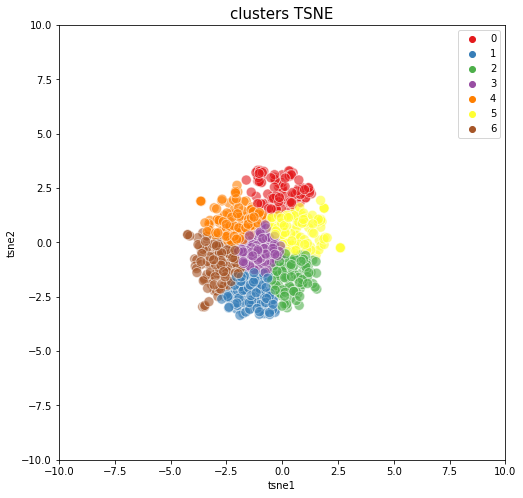

In [33]:
#plot
plt.figure(figsize = (8,8))
sns.scatterplot(clusters.iloc[:,0],clusters.iloc[:,1],hue=labels, palette='Set1', s=100, alpha=0.6).set_title('clusters TSNE', fontsize=15)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.legend()
plt.show()

In [34]:
#ARI
df_image['cluster_ORB'] = labels
categories_true = df_image['cat_1']
categories_predict = df_image['cluster_ORB']
from sklearn import metrics
ari_SIFT = metrics.adjusted_rand_score(categories_true, categories_predict)
print("ARI: %0.3f"
      % metrics.adjusted_rand_score(categories_true, categories_predict))

ARI: 0.033
